In [16]:
## many thanks to Valeri Karpov for making this database of box scores available.
## https://thecodebarbarian.wordpress.com/2014/02/14/crunching-30-years-of-nba-data-with-mongodb-aggregation/

## attempt at downloading a large existing database of 20 years of individual game box scores.
## had to separately install bson package below to handle MongoDB.

## all data below ends up in 'df'
import bson
import tarfile
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
## load in bson data as python dictionary
box_scores_bson = tarfile.open("/Users/Siwen/incubator/nba2.tgz")
box_scores_file = box_scores_bson.extractfile('dump/nba/games.bson')
box_scores = bson.decode_all(box_scores_file.read())

In [51]:
pd.DataFrame(box_scores)

,_id,box,date,teams
0,52f29f91ddbd75540aba6dae,"[{'won': 1, 'team': {'ft_pct': '.769', 'pf': 1...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'WSB', 'name': 'Wa..."
1,52f29f92ddbd75540aba6daf,"[{'won': 1, 'team': {'ft_pct': '.707', 'pf': 3...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'CHI', 'name': 'Ch..."
2,52f29f93ddbd75540aba6db0,"[{'won': 1, 'team': {'ft_pct': '.816', 'pf': 3...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'DET', 'name': 'De..."
3,52f29f93ddbd75540aba6db1,"[{'won': 1, 'team': {'ft_pct': '.791', 'pf': 4...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'DEN', 'name': 'De..."
4,52f29f94ddbd75540aba6db2,"[{'won': 1, 'team': {'ft_pct': '.806', 'pf': 3...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'NJN', 'name': 'Ne..."
5,52f29f94ddbd75540aba6db3,"[{'won': 1, 'team': {'ft_pct': '.895', 'pf': 3...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'POR', 'name': 'Po..."
6,52f29f95ddbd75540aba6db4,"[{'won': 1, 'team': {'ft_pct': '.750', 'pf': 3...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'LAC', 'name': 'Lo..."
7,52f29f95ddbd75540aba6db5,"[{'won': 1, 'team': {'ft_pct': '.706', 'pf': 2...",1985-10-25 04:00:00,"[{'won': 1, 'abbreviation': 'HOU', 'name': 'Ho..."
8,52f29f96ddbd75540aba6db6,"[{'won': 1, 'team': {'ft_pct': '.867', 'pf': 3...",1985-10-26 04:00:00,"[{'won': 1, 'abbreviation': 'CHI', 'name': 'Ch..."
9,52f29f96ddbd75540aba6db7,"[{'won': 1, 'team': {'ft_pct': '.733', 'pf': 2...",1985-10-26 04:00:00,"[{'won': 1, 'abbreviation': 'BOS', 'name': 'Bo..."


In [52]:
box_contents = {}

for i,box in enumerate(box_scores):
    box_contents[i] = box['box']

In [55]:
box_contents[20000][0]

{'players': [{'ast': 2,
   'blk': 0,
   'drb': 8,
   'fg': 7,
   'fg3': 4,
   'fg3_pct': '.364',
   'fg3a': 11,
   'fg_pct': '.350',
   'fga': 20,
   'ft': 0,
   'ft_pct': '',
   'fta': 0,
   'mp': '45:00',
   'orb': 6,
   'pf': 2,
   'player': 'Quentin Richardson',
   'plus_minus': '+15',
   'pts': 18,
   'stl': 1,
   'tov': 1,
   'trb': 14},
  {'ast': 1,
   'blk': 0,
   'drb': 8,
   'fg': 7,
   'fg3': 3,
   'fg3_pct': '.500',
   'fg3a': 6,
   'fg_pct': '.467',
   'fga': 15,
   'ft': 0,
   'ft_pct': '',
   'fta': 0,
   'mp': '39:00',
   'orb': 4,
   'pf': 2,
   'player': 'Joe Johnson',
   'plus_minus': '+12',
   'pts': 17,
   'stl': 1,
   'tov': 1,
   'trb': 12},
  {'ast': 1,
   'blk': 1,
   'drb': 7,
   'fg': 5,
   'fg3': 0,
   'fg3_pct': '',
   'fg3a': 0,
   'fg_pct': '.333',
   'fga': 15,
   'ft': 9,
   'ft_pct': '.643',
   'fta': 14,
   'mp': '37:00',
   'orb': 2,
   'pf': 4,
   'player': "Amar'e Stoudemire",
   'plus_minus': '+2',
   'pts': 19,
   'stl': 1,
   'tov': 6,
   'trb':

In [56]:
team_1_pts = {}
team_1_3pa = {}
team_1_3pm = {}
team_2_pts = {}
team_2_3pa = {}
team_2_3pm = {}

for k,v in box_contents.items():
    team_1_pts[k] = box_contents[k][0]['team']['pts']
    team_1_3pa[k] = box_contents[k][0]['team']['fg3a']
    team_1_3pm[k] = box_contents[k][0]['team']['fg3']
    team_2_pts[k] = box_contents[k][1]['team']['pts']
    team_2_3pa[k] = box_contents[k][1]['team']['fg3a']
    team_2_3pm[k] = box_contents[k][1]['team']['fg3']

In [7]:
## load game date and teams playing
dates = {}
team1 = {}
team2 = {}

for i, box in enumerate(box_scores):
    dates[i] = box['date']
    team1[i] = box['teams'][0]['abbreviation']
    team2[i] = box['teams'][1]['abbreviation']
    


    

In [8]:
print(box_scores[0]['teams'][0])

{'won': 1, 'abbreviation': 'WSB', 'name': 'Washington Bullets', 'score': 100, 'home': False}


In [63]:
d = {'Team 1 3-pointers made': team_1_3pm, 'Team 1 3-point attempts': team_1_3pa,  \
     'Team 1 points': team_1_pts, 'Team 2 3-pointers made': team_2_3pm, 'Team 2 3-point attempts': team_2_3pa,\
     'Team 2 points': team_2_pts, 'Date': dates, 'Team 1 name': team1, 'Team 2 name': team2}
df = pd.DataFrame(data=d)

In [64]:
df.tail()

,Date,Team 1 3-point attempts,Team 1 3-pointers made,Team 1 name,Team 1 points,Team 2 3-point attempts,Team 2 3-pointers made,Team 2 name,Team 2 points
31681,2004-04-14 04:00:00,11,3,ORL,95,14,2,PHI,89
31682,2004-04-14 04:00:00,24,7,LAL,105,11,4,POR,104
31683,2004-04-14 04:00:00,10,1,SAS,93,9,2,DEN,67
31684,2004-04-14 04:00:00,16,7,PHO,89,15,4,UTA,84
31685,2004-04-14 04:00:00,22,8,NOH,94,19,4,WAS,78


In [10]:
df['Team 1 points']

0        100
1        116
2        118
3        119
4        113
5        128
6        108
7        112
8        121
9        105
10       101
11       123
12       119
13       130
14       117
15        99
16       121
17       116
18       102
19        97
20       133
21       124
22       111
23       111
24       119
25       119
26       142
27       124
28       117
29       147
        ... 
31656    114
31657    129
31658     84
31659     93
31660     93
31661     97
31662    101
31663    104
31664    101
31665    107
31666     78
31667    111
31668    110
31669    109
31670     98
31671     87
31672    137
31673     97
31674     92
31675    101
31676    118
31677    107
31678     96
31679     89
31680    100
31681     95
31682    105
31683     93
31684     89
31685     94
Name: Team 1 points, dtype: int64

<IPython.core.display.Javascript object>


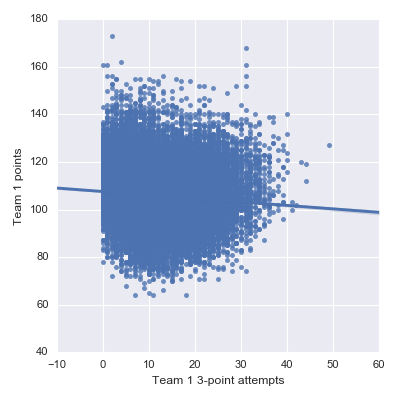

In [11]:
sns.lmplot('Team 1 3-point attempts', 'Team 1 points', data=df, fit_reg=True)

<IPython.core.display.Javascript object>


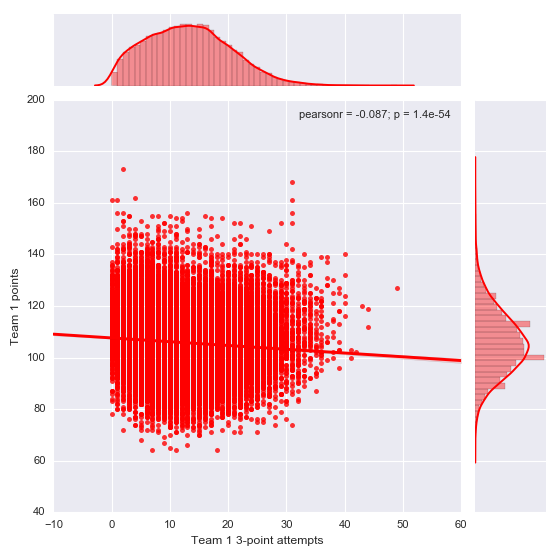

In [12]:
g = sns.jointplot("Team 1 3-point attempts", "Team 1 points", data=df, kind="reg",
                   color="r", size=7)

plt.savefig('points_v_3pa.pdf')

<IPython.core.display.Javascript object>


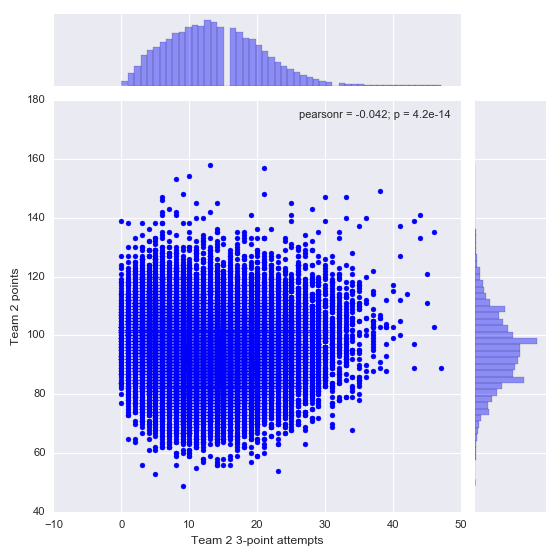

In [13]:
g = sns.jointplot("Team 2 3-point attempts", "Team 2 points", data=df,
                   color="b", size=7)

In [14]:
pts_vs_3pa_win = df['Team 1 points'].groupby(df["Team 1 3-point attempts"])
pts_mean_win = pts_vs_3pa_win.mean()

pts_vs_3pa_lose = df['Team 2 points'].groupby(df["Team 2 3-point attempts"])
pts_mean_lose = pts_vs_3pa_lose.mean()

In [15]:
print(pts_mean_win)
print(pts_mean_lose)

Team 1 3-point attempts
0     112.280000
1     111.864553
2     112.048533
3     110.568452
4     110.441729
5     108.457217
6     107.803695
7     106.632472
8     105.697301
9     104.888583
10    103.897251
11    103.721756
12    103.376398
13    102.925466
14    103.178410
15    103.078261
16    103.249209
17    103.498963
18    104.048324
19    104.365601
20    104.561387
21    105.361022
22    105.209007
23    106.492515
24    107.097473
25    105.991579
26    107.749304
27    108.025316
28    106.985849
29    108.487500
30    109.541985
31    110.444444
32    109.321839
33    111.851852
34    113.000000
35    108.320000
36    111.925926
37    119.500000
38    113.888889
39    112.111111
40    126.600000
41    101.500000
42    102.000000
43    120.000000
44    115.500000
49    127.000000
Name: Team 1 points, dtype: float64
Team 2 3-point attempts
0     100.555556
1      99.918539
2      99.982079
3      99.355634
4      99.270161
5      98.268807
6      98.043160
7      95.89183

In [16]:
win_counts = {}
lose_counts = {}

for k,v in pts_vs_3pa_win:
    win_counts[k] = len(v)
    
for k,v in pts_vs_3pa_lose:
    lose_counts[k] = len(v)
    
keylist = np.unique(list(win_counts.keys()) + list(lose_counts.keys()))

win_frac = {}
win_std = {} 
#formula for std dev for bernoulli process: (p(1-p)/n)**.5

for key in keylist:
    if key in win_counts.keys(): 
        if key in lose_counts.keys():
            samplesize = win_counts[key] + lose_counts[key]
            win_frac[key] = win_counts[key]/samplesize
            
        else:
            win_frac[key] = 1
            samplesize = win_counts[key]
    
    else: #if not in win-list, key must be in lose-list
        win_frac[key] = 0
        samplesize = lose_counts[key]
        
    win_std[key] = (win_frac[key]*(1-win_frac[key])/samplesize)**.5

In [76]:
for k,v in win_std.items():
    print(k,v)

0 0.020221290375622307
1 0.01460900997479229
2 0.012813954293560253
3 0.011552624223421484
4 0.011020263645501653
5 0.01054326979162906
6 0.009942506785649006
7 0.009663018664558168
8 0.009360892773924701
9 0.009203209094236704
10 0.00888828610639041
11 0.008749235778939062
12 0.00872616075723884
13 0.008497782106519091
14 0.008631046398040285
15 0.008749579038365998
16 0.008828313882529203
17 0.009212175934754338
18 0.009789485934604429
19 0.010081400425169935
20 0.010642421367482818
21 0.01148236281792776
22 0.01228057769054929
23 0.013653770432506589
24 0.015014264234501395
25 0.01630727897305029
26 0.01852948455175235
27 0.02007672169753747
28 0.02379182668084088
29 0.02746730537125521
30 0.031241415752123358
31 0.035082473842998854
32 0.038657157173426486
33 0.048992756285102704
34 0.0534318296317478
35 0.06572532011099606
36 0.07357035128653369
37 0.08395897088010118
38 0.12401959270615269
39 0.12401959270615269
40 0.16563466499998442
41 0.17074694419062766
42 0.3535533905932738


In [17]:
win_df = pd.DataFrame({'win %': win_frac, 'std dev': win_std})
win_df.index = keylist
win_df['3pa'] = win_df.index

print(win_df.tail())

    std dev  win %  3pa
44     0.25    0.5   44
45     0.00    0.0   45
46     0.00    0.0   46
47     0.00    0.0   47
49     0.00    1.0   49


<IPython.core.display.Javascript object>


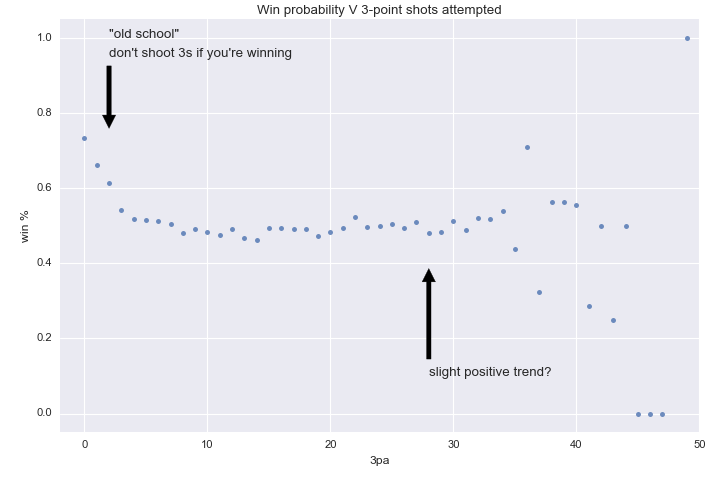

In [18]:
#what is your probability of winning given the number of 3-pointers you launched?
g = sns.lmplot(x="3pa", y="win %", data=win_df, fit_reg = False, size=6, aspect=1.5)
g.set(ylim=(-.05, 1.05))
g.set(xlim=(-2, 50))
g.set(title = "Win probability V 3-point shots attempted")
plt.annotate("\"old school\"", xy=(2, 1))
plt.annotate("don't shoot 3s if you're winning", xy=(2,.75), xytext=(2, .95),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("slight positive trend?", xy=(28,.4), xytext=(28, .1),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('winpct_v_3pa.pdf')

#mean = win_df['win %']
#std  = win_df['std dev']
#ax.errorbar(df.index, mean, yerr=std, fmt='-o') #fmt=None to plot bars only

In [ ]:
## NEW FIGURE ##
## use seaborn to show the rise of three pointers and also the increase in 3 point percentage 
## over time

## argument: the better you shoot 3 pointers, the more you should be shooting them....

In [69]:
## want to be able to group by seasons - convert day of game to season it occurred in
startday = datetime.datetime(1985,7,1)
days_since_start = df['Date']-startday
seasons = [ np.ceil(x.days/365).astype(int) for x in season_list ]
df['Season'] = seasons

In [110]:
print(df.ix(20000))

In [65]:
df['Total 3-point attempts'] = df['Team 1 3-point attempts'] + df['Team 2 3-point attempts'] 
df['Total 3-pointers made'] = df['Team 1 3-pointers made'] + df['Team 2 3-pointers made'] 

In [88]:
seasons = df.groupby("Season")

In [107]:
for k,v in seasons:
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [116]:
season_mean_3pa = np.zeros(28,)
season_mean_3pm = np.zeros(28,)
season_mean_3pct = np.zeros(28,)

for k,v in seasons:
    
    print(k)
    
    threes_att = seasons.get_group(k)['Total 3-point attempts']
    threes_made = seasons.get_group(k)['Total 3-pointers made']
    
    season_mean_3pa[k-1] = np.mean(threes_att)
    season_mean_3pm[k-1] = np.mean(threes_made)
    season_mean_3pct[k-1] = np.mean(threes_made)/np.mean(threes_att)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


<IPython.core.display.Javascript object>


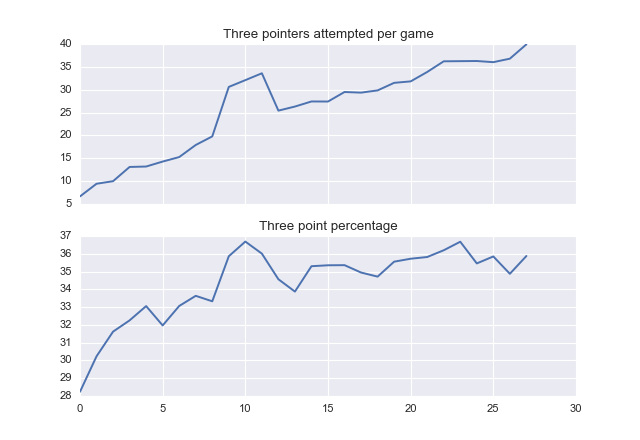

In [124]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(season_mean_3pa)
axarr[1].plot(100*season_mean_3pct)
axarr[0].set_title('Three pointers attempted per game')
axarr[1].set_title('Three point percentage')
plt.savefig('3pa_3pct_season.pdf')


In [ ]:
## NEXT NEW FIGURE - show the difference between first decade and second decade

In [130]:
## restrict df by season
df_firsthalf = df[df["Season"] < 14.5]
df_secondhalf = df[df["Season"] > 14.5]

In [131]:
len(df_secondhalf)

16898

<IPython.core.display.Javascript object>


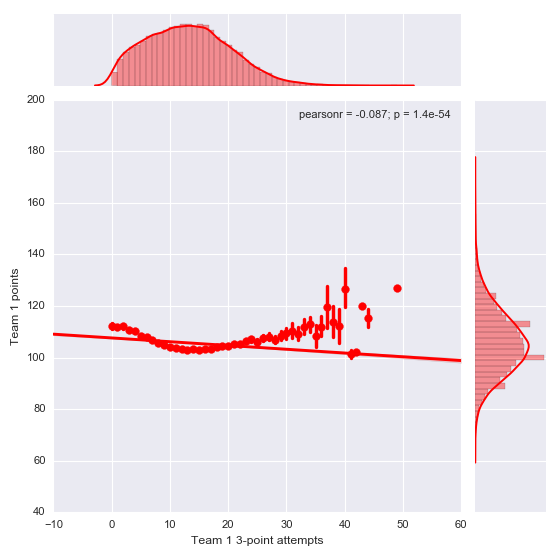

In [28]:
g = sns.jointplot("Team 1 3-point attempts", "Team 1 points", data=df, kind="reg",
                   color="r", size=7, x_estimator = np.mean)

In [ ]:
g = sns.jointplot("Team 1 3-point attempts", "Team 1 points", data=df_firsthalf, kind="reg",
                   color="r", size=7, x_estimator = np.mean)

In [ ]:
g = sns.jointplot("Team 1 3-point attempts", "Team 1 points", data=df_secondhalf, kind="reg",
                   color="r", size=7, x_estimator = np.mean)